1. Download and install the libsvm software library from:
        https://www.csie.ntu.edu.tw/~cjlin/libsvm
and briefly consult the documentation to become more familiar with the tools.

In [149]:
# imports
from libsvm.svmutil import *

2. Download the Abalone data set: http://archive.ics.uci.edu/ml/datasets/Abalone
Use the libsvm scaling tool to scale the features of all the data. Use the first 3133 examples for
training, the last 1044 for testing. The scaling parameters should be computed only on the training
data and then applied to the test data.


In [150]:
[Y,X]=svm_read_problem("abalone.data")

In [151]:
X_train = X[0:3134]
Y_train = Y[0:3134]
X_test = X[3134:]
Y_test = Y[3134:]

In [152]:
l = -1
r = 1

In [153]:
scale_param = {}
for i in range(1,9):
    scale_param[i] = [X_train[0][i], X_train[0][i]]
for x in X_train:
    for i in range(1,9):
        if(x[i]<scale_param[i][0]):
            scale_param[i][0] = x[i]
        
        if(x[i]>scale_param[i][1]):
            scale_param[i][1] = x[i]
scale_param

{1: [1.0, 3.0],
 2: [0.075, 0.815],
 3: [0.055, 0.65],
 4: [0.0, 1.13],
 5: [0.002, 2.8255],
 6: [0.001, 1.488],
 7: [0.0005, 0.76],
 8: [0.0015, 1.005]}

In [154]:
for x in X_train+X_test:
    for i in range(1,9):
        phi = (x[i]-scale_param[i][0])/(scale_param[i][1]-scale_param[i][0])
        x[i] = l+phi*(r-l)

In [155]:
scale_param = {}
for i in range(1,9):
    scale_param[i] = [X_train[0][i], X_train[0][i]]
for x in X_train:
    for i in range(1,9):
        if(x[i]<scale_param[i][0]):
            scale_param[i][0] = x[i]
        
        if(x[i]>scale_param[i][1]):
            scale_param[i][1] = x[i]
scale_param

{1: [-1.0, 1.0],
 2: [-1.0, 1.0],
 3: [-1.0, 1.0],
 4: [-1.0, 1.0],
 5: [-1.0, 1.0],
 6: [-1.0, 1.0],
 7: [-1.0, 1.0],
 8: [-1.0, 1.0]}

3. Consider binary classification that consists of distinguishing classes 1 through 9 from the rest...

In [156]:
# Splitting training data into 5 disjoint sets
import random
indices = list(range(len(X_train)))
random.shuffle(indices)
avgSize = int(len(indices)/5)

In [157]:
print (avgSize)
print (avgSize*5)

626
3130


In [166]:
xSets = []
ySets = []
for i in range(5):
    xSet = []
    ySet = []
    for j in range(avgSize):
        xSet.append(X_train[indices[avgSize*i+j]])
        ySet.append(Y_train[indices[avgSize*i+j]])
    xSets.append(xSet)
    ySets.append(ySet)

[{1: 1.0, 2: 0.2702702702702704, 3: 0.26050420168067223, 4: -0.7345132743362832, 5: -0.4758278732070126, 6: -0.5272360457296571, 7: -0.5852534562211982, 8: -0.5884404583956153}, {1: 0.0, 2: 0.3378378378378377, 3: 0.24369747899159666, 4: -0.7699115044247787, 5: -0.44749424473171595, 6: -0.504371217215871, 7: -0.5418038183015143, 8: -0.6113602391629296}, {1: -1.0, 2: 0.44594594594594605, 3: 0.4285714285714286, 4: -0.7079646017699115, 5: -0.12024083584204004, 6: -0.14794889038332226, 7: -0.3245556287030942, 8: -0.3951170901843547}, {1: 0.0, 2: 0.4189189189189191, 3: 0.41176470588235303, 4: -0.7345132743362832, 5: -0.20099167699663545, 6: -0.22797579018157377, 7: -0.48518762343647137, 8: -0.3951170901843547}, {1: 0.0, 2: -0.1216216216216216, 3: -0.10924369747899154, 4: -0.8053097345132743, 5: -0.7513724101292723, 6: -0.812373907195696, 7: -0.7419354838709677, 8: -0.8036870951669157}, {1: -1.0, 2: 0.6081081081081083, 3: 0.6470588235294119, 4: -0.6460176991150441, 5: 0.20453338055604742, 6: 

In [159]:
from matplotlib import pyplot as plt
import math

In [188]:
def cross_validate(d):
    Cs = []
    errors = []
    sigmas = []
    k = 5
    mss = []
    
    for j in range(-k, k+4):
        C = 3**j
        errorSum = 0;
        sqSum = 0
        ms = []
        for n in range(5):
            testX, trainX, testY, trainY = merge_data(n)
            prob = svm_problem(trainY, trainX)
            param = svm_parameter('-t 1 -c '+str(C)+' -d '+str(d))
            print('-t 1 -c '+str(C)+' -d '+str(d))
            m = svm_train(prob, param)
            # save model to prevent loss
            svm_save_model(str(d)+','+str(j)+','+str(n)+'.model', m)
            ms.append(m)
            labels, acc, vals = svm_predict(testY, testX, m)
            errorSum+=1-acc[0]/100
            sqSum+=(1-acc[0]/100)**2
        Cs.append(C)
        mean = errorSum/5
        errors.append(mean)
        sigmas.append(math.sqrt((sqSum-5*(mean**2))/4))
        print("avg error: "+str(errorSum/5))
        print("std: "+str(math.sqrt((sqSum-5*(mean**2))/4)))
        mss.append(ms)
    return Cs, errors, sigmas, mss
        
# Remerge data for cross validation
def merge_data(n):
    trainX = []
    testX = xSets[n]
    trainY = []
    testY = ySets[n]
    for i in range(5):
        if(i!=n):
            trainX+=xSets[i]
            trainY+=ySets[i]
    return testX, trainX, testY, trainY

In [189]:
Css = []
errorss = []
sigmass = []
msss = []
for d in range(1, 6):
    Cs, errors, sigmas, mss = cross_validate(d)
    Css.append(Cs)
    errorss.append(errors)
    sigmass.append(sigmas)
    msss.append(mss)

-t 1 -c 0.00411522633744856 -d 1
Accuracy = 18.2109% (114/626) (classification)
-t 1 -c 0.00411522633744856 -d 1
Accuracy = 14.6965% (92/626) (classification)
-t 1 -c 0.00411522633744856 -d 1
Accuracy = 16.9329% (106/626) (classification)
-t 1 -c 0.00411522633744856 -d 1
Accuracy = 15.016% (94/626) (classification)
-t 1 -c 0.00411522633744856 -d 1
Accuracy = 18.6901% (117/626) (classification)
avg error: 0.8329073482428117
std: 0.018129406976483152
-t 1 -c 0.012345679012345678 -d 1
Accuracy = 18.2109% (114/626) (classification)
-t 1 -c 0.012345679012345678 -d 1
Accuracy = 14.6965% (92/626) (classification)
-t 1 -c 0.012345679012345678 -d 1
Accuracy = 16.9329% (106/626) (classification)
-t 1 -c 0.012345679012345678 -d 1
Accuracy = 15.016% (94/626) (classification)
-t 1 -c 0.012345679012345678 -d 1
Accuracy = 18.6901% (117/626) (classification)
avg error: 0.8329073482428117
std: 0.018129406976483152
-t 1 -c 0.037037037037037035 -d 1
Accuracy = 18.3706% (115/626) (classification)
-t 1 -c 

Accuracy = 26.6773% (167/626) (classification)
-t 1 -c 3 -d 2
Accuracy = 27.6358% (173/626) (classification)
-t 1 -c 3 -d 2
Accuracy = 24.9201% (156/626) (classification)
-t 1 -c 3 -d 2
Accuracy = 22.3642% (140/626) (classification)
-t 1 -c 3 -d 2
Accuracy = 23.4824% (147/626) (classification)
avg error: 0.7498402555910543
std: 0.021803795206536556
-t 1 -c 9 -d 2
Accuracy = 26.9968% (169/626) (classification)
-t 1 -c 9 -d 2
Accuracy = 28.115% (176/626) (classification)
-t 1 -c 9 -d 2
Accuracy = 26.0383% (163/626) (classification)
-t 1 -c 9 -d 2
Accuracy = 22.2045% (139/626) (classification)
-t 1 -c 9 -d 2
Accuracy = 24.9201% (156/626) (classification)
avg error: 0.7434504792332268
std: 0.02260820806861502
-t 1 -c 27 -d 2
Accuracy = 26.9968% (169/626) (classification)
-t 1 -c 27 -d 2
Accuracy = 27.476% (172/626) (classification)
-t 1 -c 27 -d 2
Accuracy = 25.5591% (160/626) (classification)
-t 1 -c 27 -d 2
Accuracy = 23.6422% (148/626) (classification)
-t 1 -c 27 -d 2
Accuracy = 25.2396

Accuracy = 28.754% (180/626) (classification)
-t 1 -c 6561 -d 3
Accuracy = 27.9553% (175/626) (classification)
-t 1 -c 6561 -d 3
Accuracy = 26.9968% (169/626) (classification)
-t 1 -c 6561 -d 3
Accuracy = 23.1629% (145/626) (classification)
-t 1 -c 6561 -d 3
Accuracy = 24.4409% (153/626) (classification)
avg error: 0.7373801916932907
std: 0.023736965649851064
-t 1 -c 0.00411522633744856 -d 4
Accuracy = 18.2109% (114/626) (classification)
-t 1 -c 0.00411522633744856 -d 4
Accuracy = 14.6965% (92/626) (classification)
-t 1 -c 0.00411522633744856 -d 4
Accuracy = 16.9329% (106/626) (classification)
-t 1 -c 0.00411522633744856 -d 4
Accuracy = 15.016% (94/626) (classification)
-t 1 -c 0.00411522633744856 -d 4
Accuracy = 18.6901% (117/626) (classification)
avg error: 0.8329073482428117
std: 0.018129406976483152
-t 1 -c 0.012345679012345678 -d 4
Accuracy = 18.2109% (114/626) (classification)
-t 1 -c 0.012345679012345678 -d 4
Accuracy = 14.6965% (92/626) (classification)
-t 1 -c 0.01234567901234

Accuracy = 23.8019% (149/626) (classification)
-t 1 -c 1 -d 5
Accuracy = 20.4473% (128/626) (classification)
-t 1 -c 1 -d 5
Accuracy = 23.0032% (144/626) (classification)
-t 1 -c 1 -d 5
Accuracy = 20.1278% (126/626) (classification)
-t 1 -c 1 -d 5
Accuracy = 21.5655% (135/626) (classification)
avg error: 0.7821086261980831
std: 0.01591843216403052
-t 1 -c 3 -d 5
Accuracy = 25.0799% (157/626) (classification)
-t 1 -c 3 -d 5
Accuracy = 23.0032% (144/626) (classification)
-t 1 -c 3 -d 5
Accuracy = 22.6837% (142/626) (classification)
-t 1 -c 3 -d 5
Accuracy = 22.0447% (138/626) (classification)
-t 1 -c 3 -d 5
Accuracy = 21.5655% (135/626) (classification)
avg error: 0.7712460063897764
std: 0.013526494012788746
-t 1 -c 9 -d 5
Accuracy = 25.2396% (158/626) (classification)
-t 1 -c 9 -d 5
Accuracy = 23.0032% (144/626) (classification)
-t 1 -c 9 -d 5
Accuracy = 25.8786% (162/626) (classification)
-t 1 -c 9 -d 5
Accuracy = 22.524% (141/626) (classification)
-t 1 -c 9 -d 5
Accuracy = 20.9265% (1

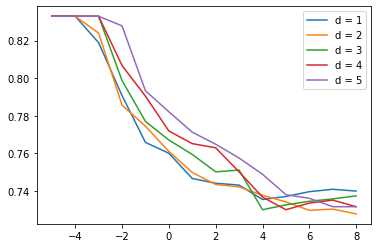

In [190]:
for i in range(5):
    plt.plot([math.log(x,3) for x in Css[i]],errorss[i], label = "d = "+str(i+1))
    

    plt.legend()

4. Let (C∗, d∗) be the best pair found previously. Fix C to be C∗. Plot the five-fold cross-validation error and the test errors for the hypotheses obtained as a function of d. Plot the average number of support vectors obtained as a function of d. How many of the support vectors lie on the margin hyperplanes?

Best performance is achieved at C* = 3^8 = 6561

Accuracy = 25.4075% (265/1043) (classification)
Accuracy = 28.4345% (178/626) (classification)
Accuracy = 26.1745% (273/1043) (classification)
Accuracy = 26.5176% (166/626) (classification)
Accuracy = 26.2704% (274/1043) (classification)
Accuracy = 27.6358% (173/626) (classification)
Accuracy = 25.5992% (267/1043) (classification)
Accuracy = 23.6422% (148/626) (classification)
Accuracy = 25.4075% (265/1043) (classification)
Accuracy = 23.8019% (149/626) (classification)
Accuracy = 26.4621% (276/1043) (classification)
Accuracy = 28.5942% (179/626) (classification)
Accuracy = 27.325% (285/1043) (classification)
Accuracy = 28.754% (180/626) (classification)
Accuracy = 25.5034% (266/1043) (classification)
Accuracy = 27.9553% (175/626) (classification)
Accuracy = 27.1333% (283/1043) (classification)
Accuracy = 25.3994% (159/626) (classification)
Accuracy = 26.7498% (279/1043) (classification)
Accuracy = 25.3994% (159/626) (classification)
Accuracy = 25.8869% (270/1043) (classification)
Accu

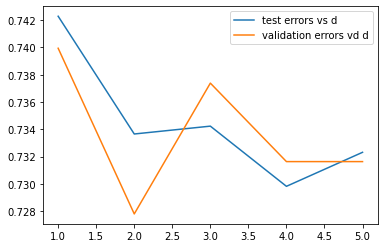

In [206]:
j = 8

errorsd = []
sigmasd = []
svNrSums = []
errorsds = []
errorsss = []
for d in range(1, 6):
    errorSum = 0
    sqSum = 0
    svNrSum = 0
    testErrors = []
    trainErrors = []
    for n in range(5):
        #gather test errors
        labels, acc, vals = svm_predict(Y_test, X_test, msss[d-1][j+5][n])
        errorSum+=1-acc[0]/100
        sqSum+=(1-acc[0]/100)**2
        svNrSum += msss[d-1][j+5][n].get_nr_sv()
        testErrors.append(1-acc[0]/100)
        #gather train errors
        testX, trainX, testY, trainY = merge_data(n)
        labels, acc, vals = svm_predict(testY, testX, msss[d-1][j+5][n])
        trainErrors.append(1-acc[0]/100)
    mean = errorSum/5
    errorsd.append(mean)
    errorsds.append(testErrors)
    errorsss.append(trainErrors)
    sigmas.append(math.sqrt((sqSum-5*(mean**2))/4))
    svNrSums.append(svNrSum/5)
plt.plot(list(range(1,6)), errorsd, label="test errors vs d")
plt.plot(list(range(1,6)), [errors[j+5] for errors in errorss], label="validation errors vd d")
plt.legend()

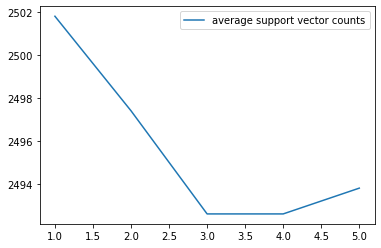

In [205]:
plt.plot(list(range(1,6)), svNrSums, label = "average support vector counts over d")
plt.legend()

5. Fix (C, d) to be (C∗, d∗). Plot the training and test errors as a function of the training sample.


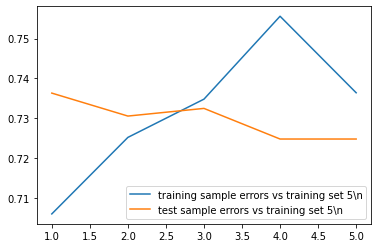

In [212]:
d = 4
plt.plot(list(range(1,6)), errorsss[d-1], label = "training sample errors vs training set 5\\n")
plt.plot(list(range(1,6)), errorsds[d-1], label = "test sample errors vs training set 5\\n")
plt.legend()